# ** _pyOpTools_ **

In [11]:
from pyoptools.all import *

## 0.  Display 3D

To visualize the optical systems and the raytracings the class *Plot3D* is used as follows:

```python
    Plot3D(Obj,center=(x,y,z),size=(a,b),rot=[(rx,ry,rz)],scale=s)
```

where: 

 $\quad$  *Obj* is the name of the optical element or system to be plotted
   
 $\quad$  *(x,y,z)* are the cartesian coordiantes of its center*
   
 $\quad$  *(a,b)* are the horizontal and vertical dimensions of the image
   
 $\quad$  *(rx,ry,rz)* are the rotation angles in radians around the axis x,y & z
   
 $\quad$ *s* is the scale of the image in the notebook.

>The y axis is pointing downwards and the z axis is pointing towards the screen.

<img style="float: left;width: 250px;" src="Repere.png">

## 1. Optical surfaces

The elemental objects in *pyOpTools* are the optical surfaces. Optical components and optical systems are just arrangements of optical surfaces. An optical surface is charcterised by its shape, its curvature and its reflectivity and as any other objet it has a position and an orientation.

### 1.1 Plane surfaces

Plane surfaces can be created as follows:

```python 
    P=Plane(shape=Shape(parameters=(,)),reflectivity=r)
```
__*Shape* can be either *Circular*, *Rectangular* or *Triangular* and the parameters can be the radius, the rectangular dimensions or the cartesian coordinates of the edges respectively.__


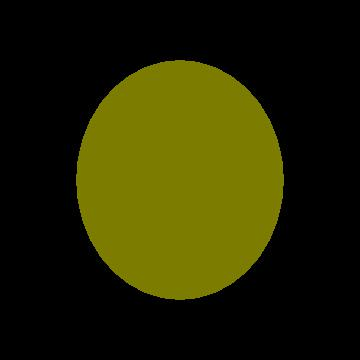

In [12]:
#Example 1.1 : Plane surfaces

P1=Plane(shape=Circular(radius=(20)),reflectivity=1)
P2=Plane(shape=Rectangular(size=(40,25)))
P3=Plane(shape=Triangular(coord=((-15,15),(5,-20),(18,12))))


Plot3D(P1,center=(0,0,0),size=(60,60),rot=[(0,-pi/6,0)],scale=6)


### 1.2 Spherical surfaces

Shperical surfaces can be created as follows:

```python
        S=Spherical(curvature=c, shape=Shape(parameters=(,)),reflectivity=r)
```
*Shape* can be either *Circular* or *Rectangular*. The curvature c$=\frac{1}{R}$, where R is the radius of the sphere that generates the spherical surface.


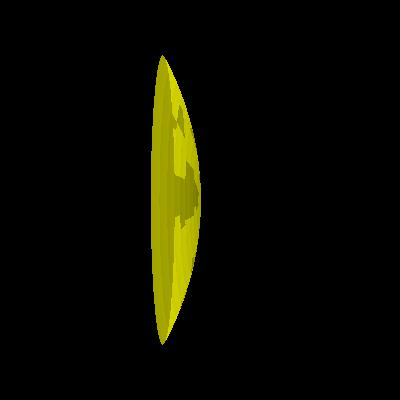

In [5]:
# Example : Spherical surface

S=Spherical(curvature=1/300., shape=Circular(radius=145.),reflectivity=1)

Plot3D(S,center=(0,0,0),size=(400,400),rot=[(0,-pi/1.9,0)],scale=1)

### 1.3 Cylinders and cylidrical surfaces

Circular cylinders and portions of them with different shapes and curvatures can be created in *pyOpTools*

```python
     S=Cylindrical(shape=Shape(parameters=(,)),curvature=c,reflectivity=r)
```
*Shape* can be *Circular*  or *Rectangular* 

the entire cylinder is created as follows:

```python
    S=Cylinder(radius=r,length=l,reflectivity=r)
```



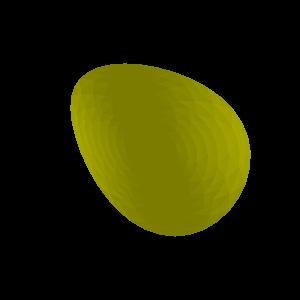

In [10]:
# Example : Circular cilynders with different shapes

S1=Cylinder(radius=36,length=100,reflectivity=1)
S2=Cylindrical(shape=Circular(radius=(50)),curvature=1/100.)
S3=Cylindrical(shape=Rectangular(size=(50,100)),curvature=1/20.)

Plot3D(S2,center=(0,0,0),size=(150,150),rot=[(pi/6,pi/6,0)],scale=2)

### 1.4 Aspheric surfaces 

*pyOpTools* allows creating aspherical surfaces. 

An aspheric surface can be written as:

$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$

The surface is defined by entering the coefficients $A_x, A_y$ and $K_x, K_y$ and the coefficients of the polynomial __*poly2d()*__ -a 2nd degree polynomial whose arguments are x,y.

```python
    sa=Aspherical(shape=Shape(parameters=(,)),Ax=A,Ay=B,Kx=C,Ky=D, poly=poly2d((a,b,c,d,e,f)))
```

>*Shape* can be either *Circular* or *Rectangular*.




>Visualize the shperical aberration;

>Idea:  Comparation of the spherical aberration

In [5]:
# Example:  poly2d in pyOpyools

p2d=poly2d((1,1,1,1,1,1))
print(p2d)


1.0+x+y+x^2+xy+y^2


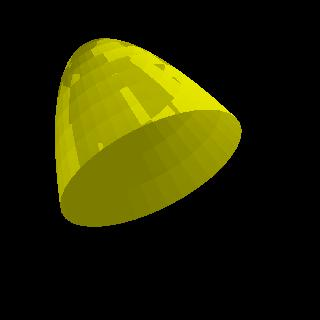

In [210]:
# Example: symmetric aspherical surface

sa=Aspherical(shape=Circular(radius=2.5),Ax=.2,Ay=.2,Kx=.1, Ky=.15, poly=poly2d((0,0,0,.5,0,.5)))
Plot3D(sa,center=(-2,-2,5),size=(8,8),rot=[(-3*pi/10,pi/4,0)],scale=40)

### 1.5 Diffraction grating

Difraction gratings in *pyOpTools* are defined as a special kind of surface.

```python
    g=RPPMask(shape=Shape(parameters=(,)), phm=poly2d([a,b,c]),M=[p])#,0,-1,-2])
```
The unit cell of the grating is defined using *poly2d*; just the linear coefficients are useful for the grating definition. The value of *a* has not importance. *b* and *c* are the linear coefficients of the unit cell in the x & y directions. The parameter p is the difraction order to be taken into account. *Shape* can be either *Circular* or *Rectangular*.

> A diffraction grating example will be presented in section 4.

# 2. From Optical surfaces to Optical components

By properly linking some optical surfaces it is possible to build several optical components using the *pyOpTools* class *Component* as follows:
```python
    P=Component(surflist=[(S1,(x1,y1,z1),(rx1,ry1,rz1)),
                          (S2,(x2,y2,z2),(rx2,ry2,rz2)),
                          (S3,(x3,y3,z3),(rx3,ry3,rz3))],material=n)            
```
    
where 

$
    \quad S_i$ is the name of the i-th optical surface
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ n  is the refraction index of the optical component.
   
*pyOpTools* has a class called *material* which is meant to organize a wide catalogue of refractive indexes from several lens fabricants, among them:
- sumita
- ohara
- hoya
- corning
- hoya
- schott

To access the value of the refractive index: 

```python
    n=material.fabricant['ManofacturerTM']
```

To display all the Manofacturer's TradeMarks of the lenses availables 

```python
    material.fabricant.keys()
```



Component example

Predifined components

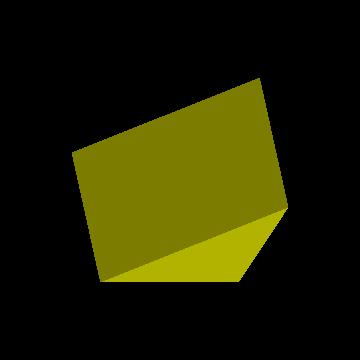

In [208]:
# Example: Building a Prisme 90°

width=50
height=50
reflectivity=1
        
a_face= Plane(shape=Rectangular(size=(width,height)))
b_face= Plane(shape=Rectangular(size=(width,height)))


h=sqrt(2.)*width
h_face= Plane (shape=Rectangular(size=(h,height)),reflectivity=0.1)
        
w2=width/2.

e1=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))
e2=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))

P=Component(surflist=[(a_face,(0,0,-width/2),(0,0,0)),
                      (b_face,(width/2,0,0),(0,pi/2,0)),
                      (h_face,(0,0,0),(0,-pi/4,0)),
                      (e1,(0,height/2,0),(pi/2,-pi/2,0)),
                      (e2,(0,height/2,0),(pi/2,-pi/2,0))
                      ],material=material.schott["BK7"])
Plot3D(P,size=(120,120),scale=3,rot=[(pi/6,pi/8,0)])

## 2.1 Predefined optical components

*pyOptools* includes several predefined components optical components.

## 2.1.1 Lens

Between the predefined lenses there are ideal lenses, ideal thick lenses, spherical lenses, doublets, airspaced doublets and a catalogue of lenses.

To crate an ideal lense of focal lenght *l* and an ideal thick lense of focal lenght *l* and thickness *t*

```python
    L2=IdealLens(shape=Shape(parameter=(,)),f=l)
    
    L=IdealTLens(shape=Shape(parameter=(,)), f=l, d=t)
```

To create a spherical lens


```python
    L1=SphericalLens(radius=r,curvature_s1=c1,curvature_s2=c2,thickness=t,material=n)
```
where *c1* and *c2* are the curvature radiis of the surfaces and *n* is the refraction index.

To create a doublet and an air spaced doublet 

    L=Doublet(radius =r,curvature_s1 = c1, curvature_s2 = c2,
                        curvature_s3 = c3, thickness_l1 = t1, thickness_l2 = t2,
                        material_l1 = n1, material_l2 = n2)
    
    L=AirSpacedDoublet(radius = r, curvature_s1= c1,curvature_s2= c2,
                        curvature_s3 = c3, curvature_s4= c4, thickness_l1= t1,air_gap= ta, thickness_l2 = t2,
                        material_l1 =n1, material_l2 = n2)

> Puede haber problemas con la visualizacion  IdealTLenses



In [217]:
L1=SphericalLens(radius=25,curvature_s1=1/100.,curvature_s2=-1/100.,thickness=8,material=material.ohara['O_PBL2'])
L=IdealTLens(shape=Rectangular(size=(10,10)), f=100, d=10)

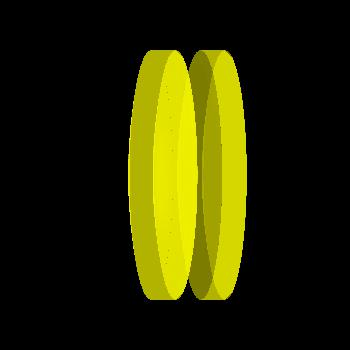

In [221]:
# Example: Visualization of an air spaced doublet

L=AirSpacedDoublet(radius = 25.,curvature_s1= 0.01,curvature_s2= 0.01,
                        curvature_s3= 0.01,curvature_s4= 0.01, thickness_l1= 5,air_gap=5 , thickness_l2= 5,
                        material_l1=1., material_l2=1.)

Plot3D(L,center=(0,0,0),size=(70,70),rot=[(0,pi/1.8,0)],scale=5)

#### Catalog of lenses

The class *library* from *pyOpTools* has the possibility to add a catalog of lenses. The catalog from *Copyright 2018, Edmund Optics Inc is included*. Other catalogues can be added and compatibility with Zemax libraries is under developpement.

To create a lens from the *Edmund Optics* catalog:

```python
    L=library.Edmund.get("LENS_CODE")
```

The lenses codes and their characteristics can be consulted in /pyoptools/raytrace/library/Edmund/SphOptics.cmp

## 2.2 Mirrors, stops & sensors

```pytho
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)
```


   Other kinds of mirrors by adjusting the shape size and reflectivity

```python
    AP=Stop(shape=Rectangular(size=(50,50)),ap_shape=Circular(radius=25))

    c=CCD()
```
    
    

In appeareance they look like simple surfaces but when interacnting with rays they have different propperties.
    

## 2.3 Optical prismes & beamsplitters

P0=RightAnglePrism(width=50,height=50,material=material.schott["BK7"],reflectivity=0)

bs=BeamSplitingCube(size=50,material=N_BK7,reflectivity=0.5)


CCD
RightAnglePrism, PentaPrism
Block, BeamSplitingCube
Stops


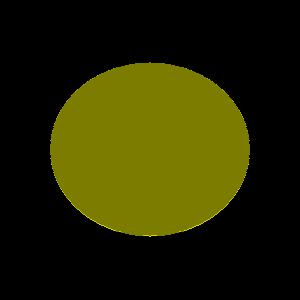

In [11]:
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)

Plot3D(m,center=(0,0,0),size=(150,150),rot=[(pi/6,0,0)],scale=2)

# Optical systems

In order to make ray tracing *pyOpTools* uses the class *System*. A System is constitued by a set of optical components arranged properly and a light beam.

By adding a CCD anywhere in the optical path it is possible to visualize the profile of the beam as it would be captured by an optical sensor.

## Optical systems without rays

First, we consider only an optical system without rays. Rays will be added later.

```python
    S=System(complist=[(C1,(x1,y1,z1),(rx1,ry1,rz1)),(C2,(x2,y2,z2),(rx2,ry2,rz2)),(C3,(x3,y3,z3),(rx3,ry3,rz3))],n=1)
```    
where

$
    \quad C_i$ is the name of the i-th optical component
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ *n*  is the refraction index of the medium in which the optical system is immersed
   






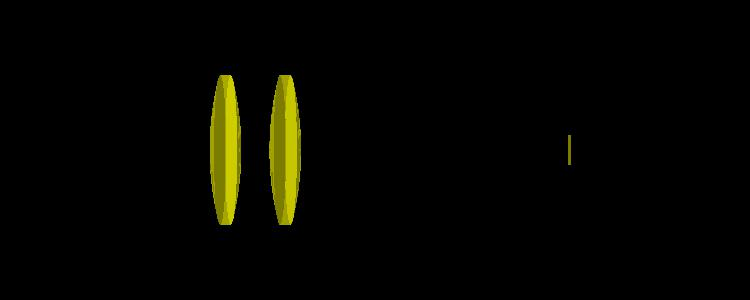

In [12]:
#Example, 2 predefined lenses and 1 CCD

#Hacer ejemplo con lentes predefinidas

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

Plot3D(S,center=(0,0,150),size=(250,100),scale=3,rot=[(0,pi/1.9,0)])

## Rays

In *pyOpTools* rays are lists containing the position of the ray's origin (x,y,z), its direction  in cartesian coordinates (ux,uy,uz) and its wavelength in $\mu$m.

```python
    R=[Ray(pos=(x,y,z),dir=(ux,uy,uz),wavelength=lambda)]
```
several rays can be generated under the same name.


It is also possible to create a beam of parallel rays or a beam of rays emitted from a point source.

```python
    PB=parallel_beam_c(origin=(x,y,z),direction=(rx,ry,rz),size=(a,b),num_rays=(na,nb),wavelength=lambda,label="")

    RS=point_source_c(origin=(x,y,z),direction=(rx,ry,rz),span=(alpha,beta),num_rays=(na,nb),wavelength=labmda,label="")
```                     
where 
    
    (x,y,z) are the coordinates of the origin of the central ray of the beam 
    
    (rz,ry,rz) are the rotation angles in radians around the axis x,y & z of the central ray of the beam
    
    (a,b) is the size of the beam in perpendicular directions to the propagation axis
    
    (na,nb) number of rays in perpendicular directions to the propagation axis
    
    (alpha,beta) are the angular dimensions of the beam in perpendicular directions to the propagation axis

> Ambiguedad en la direccion de span y size cuando apunta a angulos intermedios


> by default the beam points towards the positive z axis, it has a wavelength=0.58929, 10 rays and an angular size of $\frac{\pi}{8}$ or linear size of 1 depending on the case.



In order to add rays as a part of the optical system we use the method *ray_add*:

```python
    S.ray_add(R)
```
The method *propagate* allows to calculate the optical path that can be later visulized using Plot3D. 

```python
    S.propagate()
```    

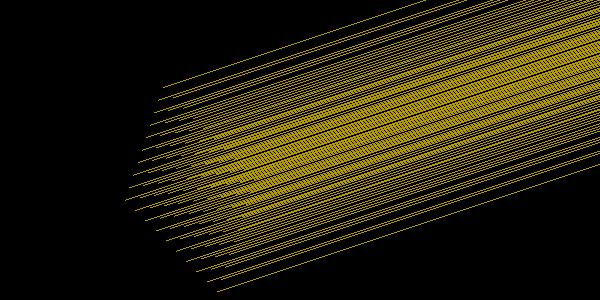

In [13]:
#Example:  visualization of a default parallel beam

S=System()
R=parallel_beam_c()

S.ray_add(R)
S.propagate()

Plot3D(S,center=(0.3,-0.4,0.6),size=(4,2),scale=150,rot=[(pi/4,pi/6,pi/4)])

An optical system in *pyOpTools* is made up by both rays and optical components. That is what is called and optical system.

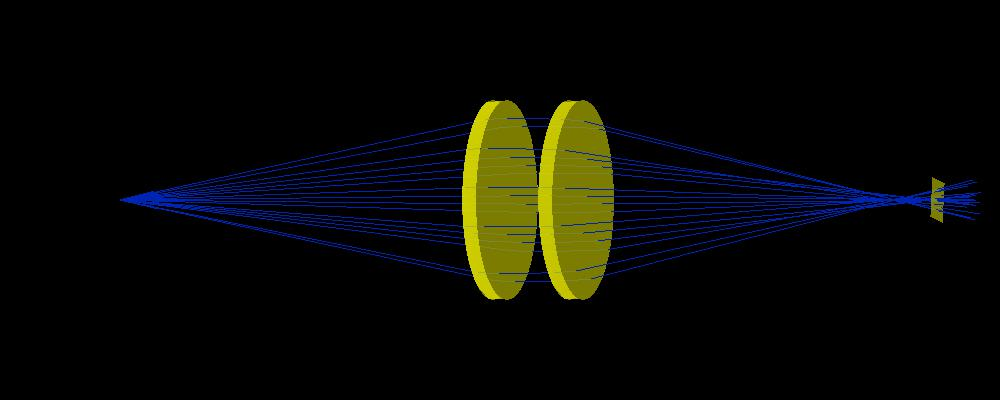

In [14]:
# Example 

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

R=point_source_c(origin=(0,0,0),direction=(0,0,0),span=(pi/8,pi/8),num_rays=(5,4),wavelength=0.45,label="")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])

## Optical maps

As it was mentionned, by putting a CCD across the light beam the optical map can be obtained. The optical path traversed by the rays hitting the detector can be also displayed.

Let be C a CCD:

To visualize the optical map as a spot diagram

```python
    spot_diagram(C)

```
To access the optical path traversed by the beam hitting the detector.

```python
    C.get_optical_path_map(size=(a,b))
``` 
>This method uses the optical path of the rays hitting the surface, to 
        create a optical path map of size (a,b) in the surface of the CCD. The returned value is an interpolation of the
        values obtained by the rays. The method needs at least 20 rays to perform the interpolation.
        
To get a p-order polynomial approximation ar the optical path map, and the associated error

```python
    poly,error=C.get_optical_path_map_lsq(order=p)
```
       

To get both the hit points in the CCD and the optical path.

```python
    C.get_optical_path_data()
```
>Data is displayed as a tuple X,Y,D, where X & Y contain the hit points, and 
        D containing the optical path.

In [15]:
# Example : Recovering the information from the CCD of the example above.

spot_diagram_c(C)

C.get_optical_path_data()




([0.84116774443665587,
  -0.8411677444366541,
  3.0013426435798145,
  0.14429892178073711,
  -0.14429892178073533,
  -3.0013426435798145,
  2.2094875944812635,
  -0.054851678622811484,
  0.054851678622811484,
  -2.2094875944812635,
  3.0013426435798145,
  0.14429892178073711,
  -0.14429892178073533,
  -3.0013426435798145,
  0.84116774443665587,
  -0.8411677444366541],
 [-2.5582670031052288,
  -2.5582670031052288,
  -1.5152286687877794,
  -0.21730157985407494,
  -0.21730157985407494,
  -1.5152286687877794,
  0.0,
  0.0,
  0.0,
  0.0,
  1.5152286687877794,
  0.21730157985407494,
  0.21730157985407494,
  1.5152286687877794,
  2.5582670031052288,
  2.5582670031052288],
 [226.00887315349453,
  226.00887315349453,
  226.17511064811097,
  225.5388709957143,
  225.5388709957143,
  226.17511064811097,
  225.89678689437423,
  225.5059733241593,
  225.5059733241593,
  225.89678689437423,
  226.17511064811097,
  225.5388709957143,
  225.5388709957143,
  226.17511064811097,
  226.00887315349453,
  

225.541983177+-8.47175300475e-16x+-1.76175218153e-18y+0.0564146857367x^2+-5.62753957308e-16xy+0.0640463330214y^2
Populating the interactive namespace from numpy and matplotlib


/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Polygon', 'unwrap', 'void', 'cross', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


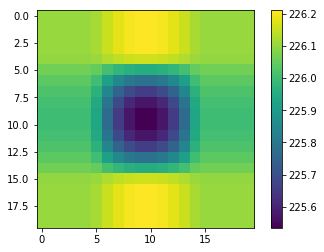

In [16]:
# Example : Polynomial aproximation and visualization of the opticla map using pylab.

#C.get_optical_path_map()

poly,error=C.get_optical_path_map_lsq(order=2)
print(poly)

%pylab inline
imshow(C.get_optical_path_map())
colorbar()



In [17]:
#%pylab inline
p2d=poly2d([1,1,1,1,1,1])
X,Y=meshgrid(linspace(-5,5,20),linspace(-5,5,20))

print(p2d)

#Z=p2d.eval(X,Y)
#imshow(Z,extent=(-5,5,-5,5));colorbar()

1.0+x+y+x^2+xy+y^2


## 4. Applications

In this section more elaborated examples involving problems in optics are presented in order to show all the potential of *pyOpTools*. Often matplotlib and *NumPy* modules will be used.

- Calculate the focal lenght

- Stability of a cavity

- Lenses comparition

- Spherical aberration. Correction

- Difracrtion grating


- Constructing an hologram

### 4.1 Building a collimator



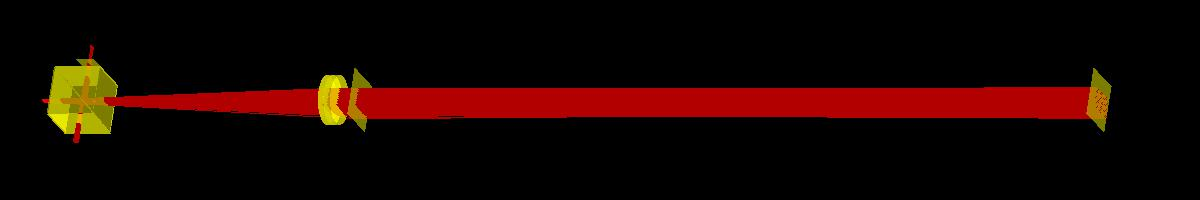

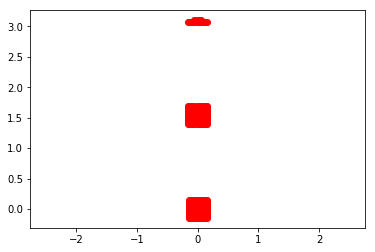

In [161]:
# Autocollimator with a plane mirror

BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
L=library.Edmund.get("32494")
M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
M2=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

C=CCD()

#Nota, hay problemas si existe una cavidad resonante
S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,156.),(0,-pi,0)),(M1,(0,0,170),(0,0,0)),(M2,(0,0,570),(.005,0,0))],n=1.)
R=point_source_c(span=(0.06,0.06),wavelength=.65)
#0.005 rad tilted

S.ray_add(R)
S.propagate()

spot_diagram_c(C)

Plot3D(S,center=(0,0,300), size=(600,100),scale=2,rot=[(0,0,-3*pi/8),(0,3*pi/8,0)])


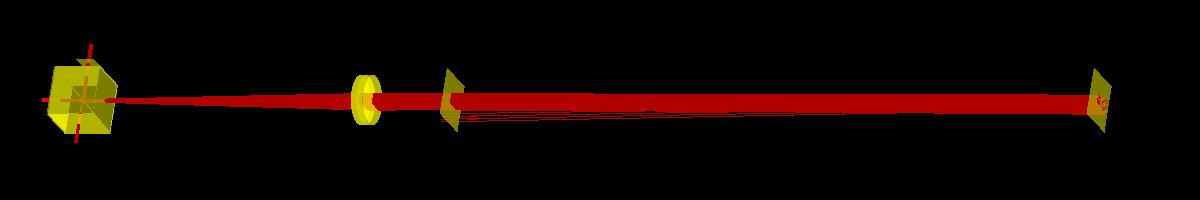

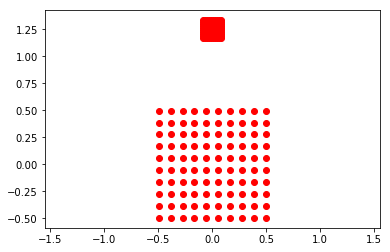

In [184]:
# Replacing the external mirror

BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
L=library.Edmund.get("32494")
M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
M2=Component(surflist=[(Spherical(curvature=1/1000.,shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

C=CCD()

#Nota, hay problemas si existe una cavidad resonante
S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,173.92009201),(0,-pi,0)),(M1,(0,0,220),(0,0,0)),(M2,(0,0,570),(0.005,0,0))],n=1.)
R=point_source_c(span=(0.03,0.03),wavelength=.65)


S.ray_add(R)
S.propagate()

spot_diagram_c(C)

Plot3D(S,center=(0,0,300), size=(600,100),scale=2,rot=[(0,0,-3*pi/8),(0,3*pi/8,0)])



In [181]:
def opsystem(lp):
    BS=BeamSplitingCube(size=25,reflectivity=.5,material=material.schott["BK7"])
    L=library.Edmund.get("32494")
    M1=Component(surflist=[(Plane(shape=Rectangular((25,25)) ,reflectivity=0.5),(0,0,0),(0,0,0))])
    M2=Component(surflist=[(Spherical(curvature=1/1000.,shape=Rectangular((25,25)) ,reflectivity=1),(0,0,0),(0,0,0))])

    C=CCD()

    S=System(complist=[(C,(20,0,20),(0,pi/2,0)),(BS,(0,0,20),(0,0,0)),(L,(0,0,lp),(0,-pi,0)),(M1,(0,0,170),(0,0,0)),(M2,(0,0,570),(0.005,0,0))],n=1.)
    R=point_source_c(span=(0.03,0.03),wavelength=.65)

    S.ray_add(R)
    S.propagate()
    X,Y,Z=C.get_optical_path_data()
    
    return array(Z).std()

In [182]:
opsystem(176)

447.63513141813189

In [212]:
%pylab inline
from scipy.optimize import fmin
fmin(opsystem,173)

Populating the interactive namespace from numpy and matplotlib
Optimization terminated successfully.
         Current function value: 0.000906
         Iterations: 27
         Function evaluations: 54


array([ 173.92009201])

In [213]:
import this


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
